In [15]:
'''В данной программе происходит построение сверточной нейронной сети и её обучение
на основе датасета Train.csv, полученого из разделенного Antivir_dataset.csv, который был создан на прошлом этапе.
Для упрощения работы используется Keras, проверяется качество работы модели с помщью графика matplotlib, так как
при выборе модели рассматривался рекуррентный управляемый блок. Он не был использован,
так как на второй эпохе процент верных ответов на проверочном наборе упал до 0.
На выходе программы данные рассматриваются как обычный текст, как и на прошлом этапе применяется токенизация.
На выходе программы имеем обученную модель и обученный на тексте токенайзер, так как на следующем этапе присвоение индексов 
словам будет производится с помощью полученных на данном этапе токенов, для корректного предикта.'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [16]:
# Максимальное количество слов 
num_words = 1300000
# Максимальная длина записи
max_len = 100
# Количество классов записей
nb_classes = 12

train = pd.read_csv("B:\Учёба\диплом\datasets\Train.csv", header = None)
train.columns = ['None','Class', 'Text']

text = train['Text']
y_train = utils.to_categorical(train['Class'] - 1, nb_classes)

tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(text)

sequences = tokenizer.texts_to_sequences(text)

In [7]:
x_train = pad_sequences(sequences, maxlen=max_len)

In [8]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 60, input_length=max_len))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(12, activation='softmax'))

In [9]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [10]:
model_cnn.summary()

model_save = 'best_model_cnn.h5'
checkpoint_callback = ModelCheckpoint(model_save, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 60)           60000000  
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 250)           75250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32128     
_________________________________________________________________
dense_1 (Dense)              (None, 12)                1548      
Total params: 60,108,926
Trainable params: 60,108,926
Non-trainable params: 0
_________________________________________________________________


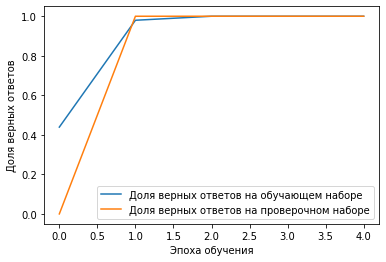

In [13]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [74]:
test = pd.read_csv('B:\Учёба\диплом\datasets\Test.csv', 
                    header=None, 
                    names=['None','class', 'text'])

test_sequences = tokenizer.texts_to_sequences(test['text'])

x_test = pad_sequences(test_sequences, maxlen=max_news_len)

y_test = utils.to_categorical(test['class'] - 1, nb_classes)

model_cnn.load_weights(model_save)

model_cnn.evaluate(x_test, y_test, verbose=1)

In [80]:
model_cnn.save('model_cnn.h5')
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)